**Rasa is Opensource Machine Learning framework used for developing AI based chatbot.**


In [ ]:
!pip install rasa==1.10.3

     |████████████████████████████████| 510 kB 5.1 MB/s 
     |████████████████████████████████| 148 kB 50.4 MB/s 
     |████████████████████████████████| 40 kB 4.9 MB/s 
     |████████████████████████████████| 417 kB 37.9 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 3.0 MB 38.7 MB/s 
     |████████████████████████████████| 104 kB 49.0 MB/s 
     |████████████████████████████████| 73 kB 1.2 MB/s 
     |████████████████████████████████| 60 kB 3.3 MB/s 
     |████████████████████████████████| 47 kB 3.7 MB/s 
     |████████████████████████████████| 448 kB 51.8 MB/s 
     |████████████████████████████████| 990 kB 41.4 MB/s 
     |████████████████████████████████| 96 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 295 kB/s 
     |████████████████████████████████| 131 kB 49.8 MB/s 
     |████████████████████████████████| 5.1 MB 32.2 MB/s 
     |████████████████████████████████| 149 kB 47.1 MB/s 
     |███████████████████████

In [ ]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!pip install nest_asyncio==1.3.3

  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.4
    Uninstalling nest-asyncio-1.5.4:
      Successfully uninstalled nest-asyncio-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.5.9 requires jupyter-client>=6.1.5, but you have jupyter-client 5.3.5 which is incompatible.


In [ ]:
import os
import rasa
import nest_asyncio

nest_asyncio.apply()
print("Event loop ready.")

Event loop ready.


In [ ]:
from rasa.cli.scaffold import create_initial_project

In [ ]:
project = "test-project"
create_initial_project(project)

In [ ]:
# move into project directory and show files
os.chdir(project)
print(os.listdir("."))

['tests', 'config.yml', 'actions.py', 'data', 'credentials.yml', 'domain.yml', '__init__.py', 'endpoints.yml', '__pycache__']


In [ ]:
config = "config.yml"
training_files = "data/"
domain = "domain.yml"
output = "models/"
print(config, training_files, domain, output)

config.yml data/ domain.yml models/


### Sometime it may not run on first go. So, try to execute below line 3 time and it work fine. It is bug in rasa.

In [ ]:
model_path = rasa.train(domain, config, [training_files], output)
print(model_path)

Training Core model...


Processed trackers: 100%|██████████| 5/5 [00:00<00:00, 98.26it/s, # actions=16]
Processed actions: 16it [00:00, 745.84it/s, # examples=16]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:17<00:00,  5.62it/s, t_loss=0.084, loss=0.010, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/utils/common.py:363: UserWarning: You specified 'DIET' to train entities, but no entities are present in the training data. Skip training of entities.
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:17<00:00,  5.60it/s, t_loss=1.579, i_loss=0.191, i_acc=1.000]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20211217-062657.tar.gz'.
models/20211217-062657.tar.gz


In [ ]:
from rasa.jupyter import chat

endpoints = 'endpoints.yml'

chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
/stop


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
/stop


In [ ]:
%%writefile data/nlu.md


## intent:check_in
- What are your check-in timings?
- check-in timings of your hotel is?
- can you tell me the check-in timing of your hotel?
- Is there any check-in timing of hotel?

## intent:check_out
- What are your check-out timings?
- check-out timings of your hotel is?
- can you tell me the check-out timing of your hotel?
- Is there any check-out timing of hotel?

## intent:cancel_resr
- How do I cancel a reservation?
- Procedure of cancel a hotel?
- Please cancel my reservation.
- Can You please cancel my reservation?

## intent:can_policy
- What is your cancellation policy?
- can you tell me about the cancellation policy of your hotel?
- cancellation policy of your hotel?
- Is there any cancellation plicy of your hotel?
- cancellation Policy of your hotel?

## intent:restaurant
- Does the hotel have a restaurant?
- Is there any restaurant in hotel?
- Any facilities of restaurant in hotel?
- any restaurant in hotel?
- did any restaurant in hotel?

## intent:breakfast
- Does the hotel offer breakfast?
- Any idea about breakfast offer by hotel?
- any complementary breakfast offer by hotel?
- Breakfast offer by hotel?
- breakfast provided by hote?

## intent:break_time
- What are the breakfast timings?
- Is there any breakfast timing?
- can you tell me the breakfast timing of hotel?
- breakfast timing?
- what is the breakfast timing of the hotel?

## intent:rest_time
- What are the timings of your restaurant?
- Is there any timing of your restaurant?
- timing of your restaurant?
- can you tell me the restaurant timing of your hotel?

## intent:clean_now
- can you send someone right now for cleaning.
- send someone right now
- right now please
- i prefer right now
- please clean my room rightnow.

## intent:clean
- i want to clean my room
- can you send somebody to clean my room
- can you send room service to clean my room
- clean my room please
- send someone to clean my room.

## intent:deluxe
- i need deluxe room
- i want deluxe room
- deluxe rooms
- can i get the deluxe rooms
- i am looking for deluxe rooms

## intent:simple
- i need simple room
- i want simple room
- simple room
- i am looking for simple room
- can i get the simple rooms

## intent:num_room
- I need [2](number) rooms
- is [3](number) room available
- [4](number) rooms
- can i get the [3](number) rooms
- I want [3](number) rooms.

## intent:book_room
- i want to book a room
- i need a room
- i am looking for a room
- is room empty
- book a room for a night.

## intent:greet
- hey
- hello
- hi
- good morning
- good evening
- hey there

## intent:goodbye
- bye
- goodbye
- see you around
- see you later

## intent:affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- wonderful
- I am feeling very good
- I am great
- I'm good

## intent:mood_unhappy
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not very good
- extremely sad
- so sad

## intent:bot_challenge
- are you a bot?
- are you a human?
- am I talking to a bot?
- am I talking to a human?


Overwriting data/nlu.md


In [ ]:
%%writefile domain.yml

intents:
  - greet
  - goodbye
  - affirm
  - deny
  - mood_great
  - mood_unhappy
  - bot_challenge
  - book_room
  - num_room
  - simple
  - deluxe
  - clean
  - clean_now
  - check_in
  - check_out
  - cancel_resr
  - can_policy
  - restaurant
  - breakfast
  - break_time
  - rest_time

responses:

  utter_can_policy:
  - text: "The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy."

  utter_restaurant:
  - text: "Yes, the hotel has a restaurant called the Zephyr Bar. With our menu we strive to reflect the historic art and the spirit of our neighborhood by offering a glimpse into what makes our area unique."
  
  utter_breakfast:
  - text: "The hotel provides its guests with a free made-to-order breakfast each morning."

  utter_break_time:
  - text: "Monday through Friday breakfast is 6 am to 9 am. On Saturday and Sunday, we are open from 7 am to 10:30 am."
  
  utter_rest_time:
  - text: "Our restaurant serves a dazzling 24-hour menu."

  utter_check_in:
  - text: "Check-in time starts at 4 PM. Minimum check-in age is 21.Please contact the reception for early check-in requests."

  utter_check_out:
  - text: "Check-out time is 11 AM. Please contact the reception for late checkout requests."
  
  utter_cancel_resr:
  - text: "To cancel a reservation, select the “Reservations” link from the homepage."

  utter_clean_now:
  - text:"sure, I will send someone to your room right now."

  utter_clean:
  - text:"When should i arrange for the cleaing?"

  utter_deluxe:
  - text:" You have choosen to book a Deluxe rooms"

  utter_simple:
  - text: "You have choosen to book a sample rooms."

  utter_num_room:
  - text: "what type of room would you want to book - simple room or Deluxe room ?"

  utter_book_room:
  - text: "How many room would you like to book?"

  utter_greet:
  - text: "Hey! How may i help you?"

  utter_cheer_up:
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_happy:
  - text: "Great, carry on!"

  utter_goodbye:
  - text: "Bye"

  utter_iamabot:
  - text: "I am a bot, powered by Rasa."

entities:
  - number

session_config:
  session_expiration_time: 60
  carry_over_slots_to_new_session: true


Overwriting domain.yml


In [ ]:
%%writefile data/stories.md

## check in
* greet
  - utter_greet
* check_in
  - utter_check_in

## check out
* greet
  - utter_greet
* check_out
  - utter_check_out

## cancel reservation
* greet
  - utter_greet
* cancel_resr
  - utter_cancel_resr

## policy
* greet
  - utter_greet
* can_policy
  - utter_can_policy

## Restaurant details
* greet
  - utter_greet
* restaurant
  - utter_restaurant

## break fast
* greet
  - utter_greet
* breakfast
  - utter_breakfast

## break time
* greet
  - utter_greet
* break_time
  - utter_break_time

## rest time
* greet
  - utter_greet
* rest_time
  - utter_rest_time

## clean_room
* greet
  - utter_greet
* clean
  - utter_clean
* clean_now
  - utter_clean_now

## book_simple_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* simple 
  - utter_simple

## book_deluxe_room
* greet
  - utter_greet
* book_room
  - utter_book_room
* num_room
  - utter_num_room
* deluxe
  - utter_deluxe

## happy path
* greet
  - utter_greet
* mood_great
  - utter_happy

## sad path 1
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* affirm
  - utter_happy

## sad path 2
* greet
  - utter_greet
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* deny
  - utter_goodbye

## say goodbye
* goodbye
  - utter_goodbye

## bot challenge
* bot_challenge
  - utter_iamabot


Overwriting data/stories.md


In [ ]:
model_path =  rasa.train(domain, config, [training_files], output)
print(model_path)

/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean_now' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_clean' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
/usr/local/lib/python3.7/dist-packages/rasa/core/domain.py:137: FutureWarning: Templates should not be strings anymore. Utterance template 'utter_deluxe' should contain either a '- text: ' or a '- custom: ' attribute to be a proper template.
  utter_templates = cls.collect_templates(data.get("responses", {}))
Processed Story Blocks:   0%|          | 0/16 [00:00<?, ?it/s, # 

Training Core model...


Processed trackers: 100%|██████████| 16/16 [00:00<00:00, 112.23it/s, # actions=44]
Processed actions: 44it [00:00, 671.78it/s, # examples=44]
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [01:11<00:00,  1.39it/s, t_loss=0.119, loss=0.009, acc=1.000]


Core model training completed.
Training NLU model...


/usr/local/lib/python3.7/dist-packages/rasa/nlu/classifiers/diet_classifier.py:595: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for tag_name, tag_ids in tag_name_to_tag_ids.items()
Epochs:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rasa/utils/tensorflow/model_data.py:386: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  final_data[k].append(np.concatenate(np.array(v)))
Epochs: 100%|██████████| 100/100 [00:51<00:00,  1.95it/s, t_loss=3.037, i_loss=1.361, entity_loss=0.013, i_acc=0.945, entity_f1=0.892]


NLU model training completed.
Your Rasa model is trained and saved at '/content/test-project/models/20211217-063251.tar.gz'.
models/20211217-063251.tar.gz


In [ ]:
endpoints = "endpoints.yml"
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
Hey! How may i help you?
I am a bot, powered by Rasa.
The hotel provides its guests with a free made-to-order breakfast each morning.
text:"sure, I will send someone to your room right now."
Yes, the hotel has a restaurant called the Zephyr Bar. With our menu we strive to reflect the historic art and the spirit of our neighborhood by offering a glimpse into what makes our area unique.
The hotel provides its guests with a free made-to-order breakfast each morning.
Great, carry on!
Great, carry on!


In [ ]:
chat(model_path, endpoints)

Your bot is ready to talk! Type your messages here or send '/stop'.
hey
Hey! How may i help you?
i want to know the cancelation policy
The booking deposit is refundable if the cancellation occurs at least 15 days before arrival.For cancellations made after this limit, a penalty will be imposed based on the cancellation policy.
/stop


In [ ]:
import rasa.data as data

stories_directory, nlu_data_directory = data.get_core_nlu_directories(training_files)

print(stories_directory, nlu_data_directory)

/tmp/tmpbfgjk7w2 /tmp/tmp7ag3943v


100%|██████████| 109/109 [00:01<00:00, 88.94it/s]


Done testing...


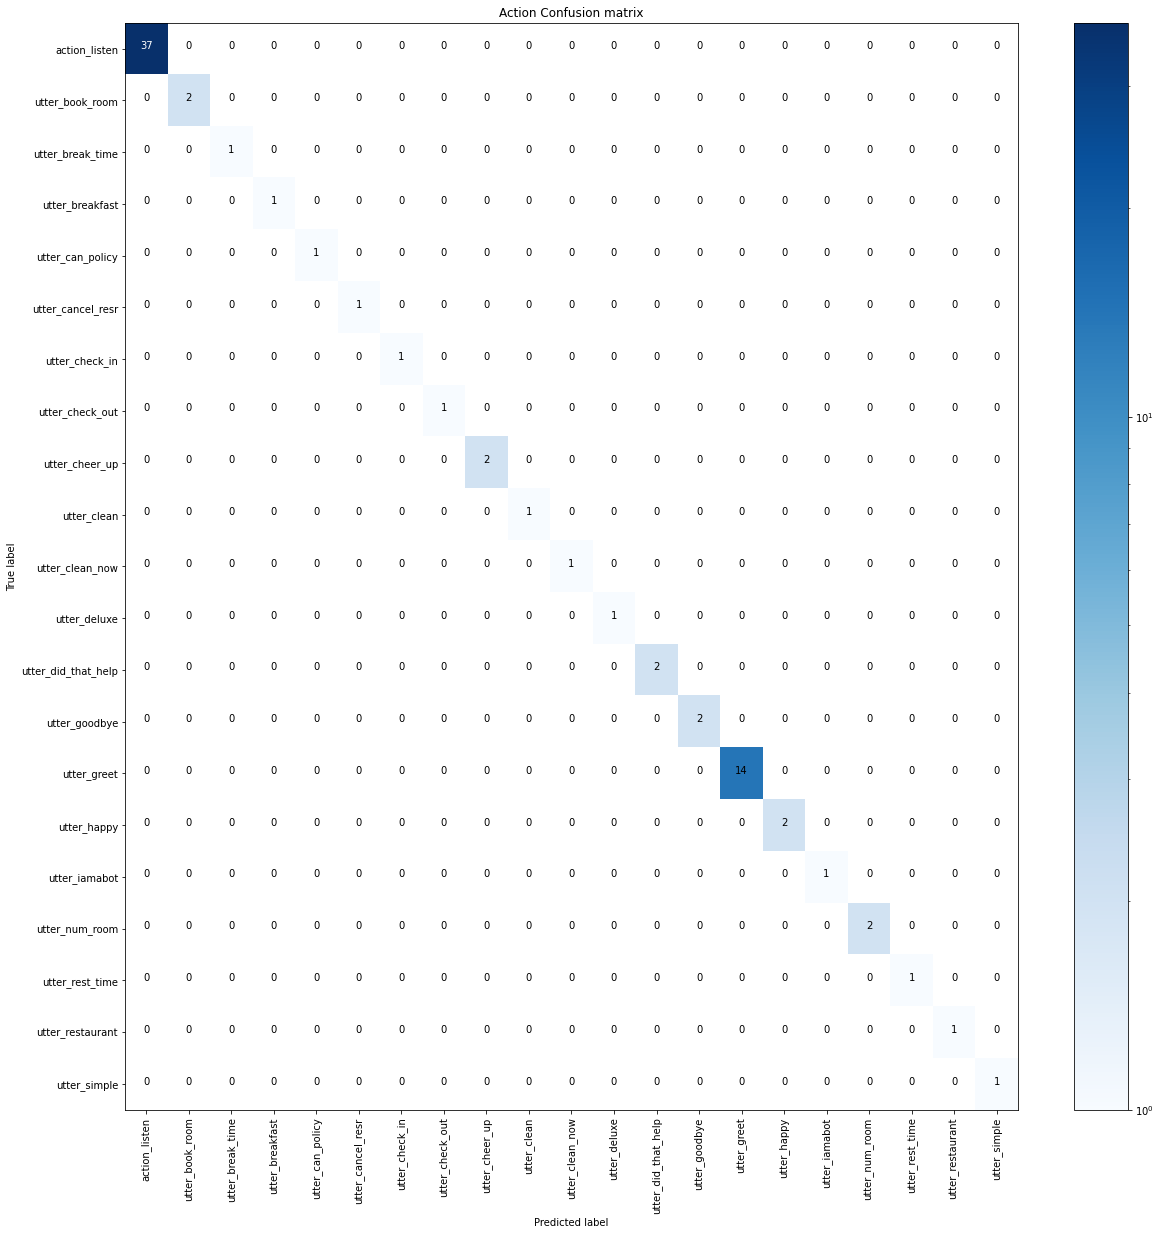

In [ ]:
rasa.test(model_path, stories_directory, nlu_data_directory)

print("Done testing...")